# Getting Python


For this course, we are going to use Jupyter notebook as our environment for developing Python code.
refer to https://jupyter.readthedocs.io/en/latest/content-quickstart.html on the instructions how to install it, the easiest way is to install from Anaconda (https://www.anaconda.com/download/) website, make sure you install (Version 4.4.0, Release Date: May 31, 2017) with Python 3.6.

Also, it is good for the students who are not familiar with python (or they need a quick refreshment) to follow Jim Bagrow tutorial http://bagrow.com/ds1/whirlwindtourpython/00-Title.html. 

All the assignments to be written in Python 3.6 and can be run using Jupyter on one of the following Internet browsers (Chrome, Safari or Firefox), these are the browsers that officially supported by jupyter.

<u> Note: for this assignment, submit your local copy of this page, running on IPython. Submit the file to Blackboard under Assignment1 using this file format:</u> <b>Yourfirstname_lastname_Assignment4.ipynb</b> 

#### <b>Deadline</b>: <u>Monday, Dec-04-2017 11:59 PM.</u>

## Assignment 4

In assignment 4 use tensor flow to build and train neural network architectures in part1 and part2.
Hint: Refer to the MLP.ipynb from the shared documents on the black borad as an example to build and train a neural network using tensor flow from scratch.
  

#### Part 1
In this part you are going to train a neural network on notMNIST dataset. The notMNIST dataset is a image recognition dataset of font glypyhs for the letters A through J useful with simple neural networks. It is quite similar to the classic MNIST dataset of handwritten digits 0 through 9. to make easy for you. the code below will load the notMNIST dataset into train, validation and testing arrays to use them during the training of the network.  
you need to download notMNIST.data from this link ...

https://drive.google.com/file/d/1ablp83xroWod-Mfr0dGlVM49YXNm32l7/view?usp=sharing

In [45]:
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
from six.moves import cPickle as loader
from six.moves import range
from sklearn.preprocessing import OneHotEncoder


data_file = 'notMNIST.data'

with open(data_file, 'rb') as f:
  data = loader.load(f)
  train_dataset = data['train_dataset']
  train_labels = data['train_labels']
  valid_dataset = data['valid_dataset']
  valid_labels = data['valid_labels']
  test_dataset = data['test_dataset']
  test_labels = data['test_labels']
  del data 

  print('Training set', train_dataset.shape, train_labels.shape)
  print('Validation set', valid_dataset.shape, valid_labels.shape)
  print('Test set', test_dataset.shape, test_labels.shape)

Training set (200000, 28, 28) (200000,)
Validation set (10000, 28, 28) (10000,)
Test set (10000, 28, 28) (10000,)


a. Convince yourself about the data by showing few  images and printing the size of train/test/validation data arrays.[10 points]

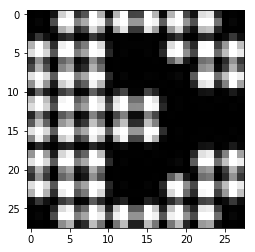

The letter in this image is E 



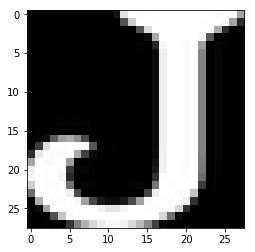

The letter in this image is J 



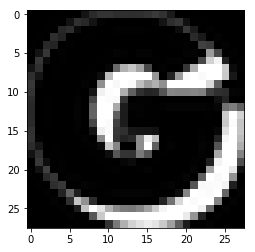

The letter in this image is G 



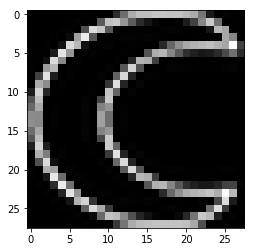

The letter in this image is C 



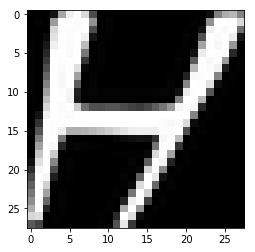

The letter in this image is H 

Training set (200000, 28, 28) (200000,)
Validation set (10000, 28, 28) (10000,)
Test set (10000, 28, 28) (10000,)


In [46]:
#show the fisrt five images
for i in range(5):
    image= train_dataset[i]
    plt.imshow(image, cmap=plt.cm.gray)
    plt.show()
    print('The letter in this image is', chr(train_labels[i]+ ord('A')), '\n')

#print the size of train/test/validation data arrays
#print(type(train_dataset))
print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

b.  Reformat data to shape that's make it easy to train neural network models:
-	 Reshape the data to a flat matrix.[5 points]. Hint: For example convert training dataset to have (200000, 784) shape, do the same for the rest of the arrays.
-	 Reformat the output to 1-hot encodings. [5 points]


In [47]:
#reshape dataset to a flat matrix
train_dataset_flat = np.reshape(train_dataset, (200000,784))
valid_dataset_flat = np.reshape(valid_dataset, (10000,784))
test_dataset_flat = np.reshape(test_dataset, (10000,784))
print('Training dataset', train_dataset_flat.shape)
print('Validation dataset', valid_dataset_flat.shape)
print('Test dataset', test_dataset_flat.shape)

#function to reformat the output to 1-hot encodings
def onehot_encoding(dataset):
    onehot_encoder = OneHotEncoder(sparse=False)
    dataset = dataset.reshape(len(dataset), 1)
    dataset_output = onehot_encoder.fit_transform(dataset)
    return dataset_output

train_labels_encoded = onehot_encoding(train_labels)
valid_labels_encoded = onehot_encoding(valid_labels)
test_labels_encoded = onehot_encoding(test_labels)
print('Training labels', train_labels_encoded.shape)
print('Validation labels', valid_labels_encoded.shape)
print('Test labels', test_labels_encoded.shape)

Training dataset (200000, 784)
Validation dataset (10000, 784)
Test dataset (10000, 784)
Training labels (200000, 10)
Validation labels (10000, 10)
Test labels (10000, 10)


c. Refer to the neural network lecture to answer the following questions (no need to code or to show experimental results for this question) [15 points]:
- the best activation function.
- the best initialization.
- Best gradient descent update learning rule. 
    

The best activation function is ReLU.

The best initialization is 
W = np.random.randn(fan_in, fan_out)/np.sqrt(fan_in/2) introduced by He et al. in 2015, which is recommended with ReLU.

Best gradient descent update learning rule is Adam.


d. Train a multi-layer neural network of one hidden layer neural network using the best: activation, initialization and gradient descent learning rule that you found in the previous question. 
Train for 15 epochs with a  batch size of 128 and pick the model that has less validation error and report the testing error for that model. Use the accuracy metric to measure the performance. [35 points]


In [4]:
# define the network toplogies, one hidden neural network with input diminsion of 784 and output diminsion of 10
n_hidden = 256 
n_input    = 784 
n_classes  = 10  

# placeholder for input and output, None: means it could be of any diminsion
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

# network parameters 
initializer = tf.contrib.layers.variance_scaling_initializer()
weights = {
    'h': tf.Variable(initializer([n_input, n_hidden])),
    'out': tf.Variable(initializer([n_hidden, n_classes]))
}
biases = {
    'b': tf.Variable(initializer([n_hidden])),
    'out': tf.Variable(initializer([n_classes]))
}
# weights = {
#     'h': tf.get_variable('1',shape=[n_input, n_hidden],initializer=tf.contrib.layers.variance_scaling_initializer()),
#     'out': tf.get_variable('2',shape=[n_hidden, n_classes],initializer=tf.contrib.layers.variance_scaling_initializer())
# }
# biases = {
#     'b': tf.get_variable('3',shape=[n_hidden],initializer=tf.contrib.layers.variance_scaling_initializer()),
#     'out': tf.get_variable('4',shape=[n_classes],initializer=tf.contrib.layers.variance_scaling_initializer())
# }

In [69]:
#define ReLU as active function
def multilayer_perceptron(_X, _weights, _biases):
    layer =  tf.nn.relu(tf.add(tf.matmul(_X, _weights['h']), _biases['b']))
    return (tf.matmul(layer, _weights['out']) + _biases['out'])

In [70]:
# build the network graph
pred = multilayer_perceptron(x, weights, biases)
# use softmax cross entropy as the loss(cost) function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred, labels=y)) 
# define optimizer
optm = tf.train.AdamOptimizer().minimize(cost) 
# measuring the accuracy
corr = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accr = tf.reduce_mean(tf.cast(corr, "float"))

In [71]:
# Training params
training_epochs = 15
batch_size      = 128 # use mini-batch
display_step    = 4 # display results every 4 epochs
valid_acc_best = 0.
test_acc_betst =0.
# launch the graph using Session()
sess = tf.Session()
# initilize all the graph parameters.
# run with the initiales
sess.run(tf.global_variables_initializer())

print ("ready to go ...")
# optimization code, we used here stochastic gradient descent SGD.
for epoch in range(training_epochs):
    avg_cost = 0.
    total_batch = int(train_dataset_flat.shape[0]/batch_size)
    # iterate
    for i in range(total_batch):
        batch_xs = train_dataset_flat[batch_size*i:batch_size*(i+1)-1]
        #print(batch_xs.shape)
        batch_ys = train_labels_encoded[batch_size*i:batch_size*(i+1)-1]
        #print(batch_ys.shape)
        feeds = {x: batch_xs, y: batch_ys}
        sess.run(optm, feed_dict=feeds)
        avg_cost += sess.run(cost, feed_dict=feeds) # to calculate the cost
    avg_cost = avg_cost / total_batch
    # display
    if (epoch+1) % 1 == 0:
        feeds = {x: batch_xs, y: batch_ys}
        train_acc = sess.run(accr, feed_dict=feeds)    
        feeds = {x: valid_dataset_flat, y: valid_labels_encoded}
        valid_acc = sess.run(accr, feed_dict=feeds)
        feeds = {x: test_dataset_flat, y: test_labels_encoded}
        test_acc = sess.run(accr, feed_dict=feeds)
        if valid_acc_best <= valid_acc:
            valid_acc_best = valid_acc
            test_acc_best = test_acc
        if (epoch+1) % display_step == 0:
            print ("Epoch: %03d/%03d cost: %.9f" % (epoch, training_epochs, avg_cost))
            print ("Train Accuracy: %.3f" % (train_acc))
            print ("Valid Accuracy: %.3f" % (valid_acc))

print ("optimization finished \n")
print ("The best valid Accuracy: %.3f" % (valid_acc_best))
print ("The test Accuracy for best valid Accuracy model: %.3f" % (test_acc_best))
print ("The test error for best valid Accuracy model: %.3f" % (1-test_acc_best))
sess.close()

ready to go ...
Epoch: 003/015 cost: 0.301535394
Train Accuracy: 0.882
Valid Accuracy: 0.887
Epoch: 007/015 cost: 0.231270141
Train Accuracy: 0.921
Valid Accuracy: 0.892
Epoch: 011/015 cost: 0.185920580
Train Accuracy: 0.969
Valid Accuracy: 0.891
optimization finished 

The best valid Accuracy: 0.892
The test Accuracy for best valid Accuracy model: 0.949
The test error for best valid Accuracy model: 0.051


e. (This part for graduate students only) Which regularization method is the best to use, L2, dropout or Batch Normalization (justify your answer experimentally). does the batch normalization help in converging the network faster ? [30 points]


## L2 Regularization

In [72]:
#L2 Regularization
beta = 0.01
cost_l2 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred, labels=y) + beta*tf.nn.l2_loss(weights['h']) +beta*tf.nn.l2_loss(weights['out']))
optm_l2 = tf.train.AdamOptimizer().minimize(cost_l2) 

# Training params
training_epochs = 15
batch_size      = 128 # use mini-batch
display_step    = 4 # display results every 4 epochs
valid_acc_best = 0.
test_acc_best = 0.
# launch the graph using Session()
sess = tf.Session()
# initilize all the graph parameters.
# run with the initiales
sess.run(tf.global_variables_initializer())
print ("ready to go ...")
print('***************************** L2 Regularization *********************************************')

# optimization code, we used here stochastic gradient descent SGD.
for epoch in range(training_epochs):
    avg_cost = 0.
    total_batch = int(train_dataset_flat.shape[0]/batch_size)
    # iterate
    for i in range(total_batch):
        batch_xs = train_dataset_flat[batch_size*i:batch_size*(i+1)-1]
        #print(batch_xs.shape)
        batch_ys = train_labels_encoded[batch_size*i:batch_size*(i+1)-1]
        #print(batch_ys.shape)
        feeds = {x: batch_xs, y: batch_ys}
        sess.run(optm_l2, feed_dict=feeds)
        avg_cost += sess.run(cost_l2, feed_dict=feeds) # to calculate the cost
    avg_cost = avg_cost / total_batch
    # display
    if (epoch+1) % 1 == 0:
        feeds = {x: batch_xs, y: batch_ys}
        train_acc = sess.run(accr, feed_dict=feeds)    
        feeds = {x: valid_dataset_flat, y: valid_labels_encoded}
        valid_acc = sess.run(accr, feed_dict=feeds)
        feeds = {x: test_dataset_flat, y: test_labels_encoded}
        test_acc = sess.run(accr, feed_dict=feeds)
        if valid_acc_best <= valid_acc:
            valid_acc_best = valid_acc
            test_acc_best = test_acc
        if (epoch+1) % display_step == 0:
            print ("Epoch: %03d/%03d cost: %.9f" % (epoch, training_epochs, avg_cost))
            print ("Train Accuracy: %.3f" % (train_acc))
            print ("Valid Accuracy: %.3f" % (valid_acc))
    
print ("optimization finished \n")
print ("The best valid Accuracy: %.3f" % (valid_acc_best))
print ("The test Accuracy for best valid Accuracy model: %.3f" % (test_acc_best))
print ("The test error for best valid Accuracy model: %.3f" % (1-test_acc_best))
sess.close()


ready to go ...
***************************** L2 Regularization *********************************************
Epoch: 003/015 cost: 0.710508094
Train Accuracy: 0.819
Valid Accuracy: 0.836
Epoch: 007/015 cost: 0.702673132
Train Accuracy: 0.819
Valid Accuracy: 0.838
Epoch: 011/015 cost: 0.700404129
Train Accuracy: 0.819
Valid Accuracy: 0.838
optimization finished 

The best valid Accuracy: 0.839
The test Accuracy for best valid Accuracy model: 0.906
The test error for best valid Accuracy model: 0.094


## Dropout

In [89]:
#Dropout 
keep_prob = tf.placeholder("float")
# Training computation.
logits_1 = tf.matmul(x, weights['h']) + biases['b']
relu_layer= tf.nn.relu(logits_1)
# Dropout on hidden layer: RELU layer
relu_layer_dropout = tf.nn.dropout(relu_layer, keep_prob)
logits_2 = tf.matmul(relu_layer_dropout, weights['out']) + biases['out']
# Normal loss function
cost_dropout = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits_2, labels=y))
optm_dropout = tf.train.AdamOptimizer().minimize(cost_dropout) 

corr_dropout = tf.equal(tf.argmax(logits_2, 1), tf.argmax(y, 1))
accr_dropout = tf.reduce_mean(tf.cast(corr_dropout, "float"))

print("ready to go ...")
print('***************************** Dropout *********************************************')

# Training params
training_epochs = 15
batch_size      = 128 # use mini-batch
display_step    = 4 # display results every 4 epochs
valid_acc_best = 0.
test_acc_best = 0.
# launch the graph using Session()
# initilize all the graph parameters.
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# optimization code, we used here stochastic gradient descent SGD.
for epoch in range(training_epochs):
    avg_cost = 0.
    total_batch = int(train_dataset_flat.shape[0]/batch_size)
    # iterate
    for i in range(total_batch):
        batch_xs = train_dataset_flat[batch_size*i:batch_size*(i+1)-1]
        #print(batch_xs.shape)
        batch_ys = train_labels_encoded[batch_size*i:batch_size*(i+1)-1]
        #print(batch_ys.shape)
        feeds = {x: batch_xs, y: batch_ys, keep_prob: 0.5}
        sess.run(optm_dropout, feed_dict=feeds)
        avg_cost += sess.run(cost_dropout, feed_dict=feeds) # to calculate the cost
    avg_cost = avg_cost / total_batch
    # display
    if (epoch+1) % 1 == 0:
        feeds = {x: batch_xs, y: batch_ys, keep_prob: 0.5}
        train_acc = sess.run(accr_dropout, feed_dict=feeds)    
        feeds = {x: valid_dataset_flat, y: valid_labels_encoded, keep_prob: 1}
        valid_acc = sess.run(accr_dropout, feed_dict=feeds)
        feeds = {x: test_dataset_flat, y: test_labels_encoded, keep_prob: 1}
        test_acc = sess.run(accr_dropout, feed_dict=feeds)
    if valid_acc_best <= valid_acc:
            valid_acc_best = valid_acc
            test_acc_best = test_acc
    if (epoch+1) % display_step == 0:
            print ("Epoch: %03d/%03d cost: %.9f" % (epoch, training_epochs, avg_cost))
            print ("Train Accuracy: %.3f" % (train_acc))
            print ("Valid Accuracy: %.3f" % (valid_acc))

print ("optimization finished \n")
print ("The best valid Accuracy: %.3f" % (valid_acc_best))
print ("The test Accuracy for best valid Accuracy model: %.3f" % (test_acc_best))
print ("The test error for best valid Accuracy model: %.3f" % (1-test_acc_best))
sess.close()

ready to go ...
***************************** Dropout *********************************************
Epoch: 003/015 cost: 0.464916616
Train Accuracy: 0.843
Valid Accuracy: 0.878
Epoch: 007/015 cost: 0.429267553
Train Accuracy: 0.843
Valid Accuracy: 0.882
Epoch: 011/015 cost: 0.405968954
Train Accuracy: 0.850
Valid Accuracy: 0.886
optimization finished 

The best valid Accuracy: 0.889
The test Accuracy for best valid Accuracy model: 0.948
The test error for best valid Accuracy model: 0.052


## Batch Normalization

In [90]:
#Batch Normalization
# Small epsilon value for the BN transform
epsilon = 1e-3
# Note that pre-batch normalization bias is ommitted.
z1_BN = tf.matmul(x, weights['h'])
#print(z1_BN)
# Calculate batch mean and variance
batch_mean1, batch_var1 = tf.nn.moments(z1_BN,[0])
#print(batch_mean1)
# Apply the initial batch normalizing transform
z1_hat = (z1_BN - batch_mean1) / tf.sqrt(batch_var1 + epsilon)
# Create two new parameters, scale and beta (shift)
scale1 = tf.Variable(tf.ones([256]))
beta1 = tf.Variable(tf.zeros([256]))
# Scale and shift to obtain the final output of the batch normalization
BN2 = tf.nn.batch_normalization(z1_BN,batch_mean1,batch_var1,beta1,scale1,epsilon)
l1_BN = tf.nn.relu(BN2)
l2 = tf.matmul(l1_BN, weights['out']) + biases['out']
# Normal loss function
cost_BN = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = l2, labels=y))
optm_BN = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost_BN) 

corr_BN = tf.equal(tf.argmax(l2, 1), tf.argmax(y, 1))
accr_BN = tf.reduce_mean(tf.cast(corr_BN, "float"))

# Training params
training_epochs = 15
batch_size      = 128 # use mini-batch
display_step    = 4 # display results every 4 epochs
valid_acc_best = 0.
test_acc_best = 0.
# initilize all the graph parameters.
# launch the graph using Session()
sess = tf.Session()
sess.run(tf.global_variables_initializer())

print ("ready to go ...")
print('***************************** Batch Normalization *********************************************')

# optimization code, we used here stochastic gradient descent SGD.
for epoch in range(training_epochs):
    avg_cost = 0.
    total_batch = int(train_dataset_flat.shape[0]/batch_size)
    # iterate
    for i in range(total_batch):
        batch_xs = train_dataset_flat[batch_size*i:batch_size*(i+1)-1]
        #print(batch_xs.shape)
        batch_ys = train_labels_encoded[batch_size*i:batch_size*(i+1)-1]
        #print(batch_ys.shape)
        feeds = {x: batch_xs, y: batch_ys}
        sess.run(optm_BN, feed_dict=feeds)
        avg_cost += sess.run(cost_BN, feed_dict=feeds) # to calculate the cost
    avg_cost = avg_cost / total_batch
    # display
    # display
    if (epoch+1) % 1 == 0:
        feeds = {x: batch_xs, y: batch_ys}
        train_acc = sess.run(accr_BN, feed_dict=feeds)    
        feeds = {x: valid_dataset_flat, y: valid_labels_encoded}
        valid_acc = sess.run(accr_BN, feed_dict=feeds)
        feeds = {x: test_dataset_flat, y: test_labels_encoded}
        test_acc = sess.run(accr_BN, feed_dict=feeds)
        if valid_acc_best <= valid_acc:
            valid_acc_best = valid_acc
            test_acc_best = test_acc
        if (epoch+1) % display_step == 0:
            print ("Epoch: %03d/%03d cost: %.9f" % (epoch, training_epochs, avg_cost))
            print ("Train Accuracy: %.3f" % (train_acc))
            print ("Valid Accuracy: %.3f" % (valid_acc))

print ("optimization finished \n")
print ("The best valid Accuracy: %.3f" % (valid_acc_best))
print ("The test Accuracy for best valid Accuracy model: %.3f" % (test_acc_best))
print ("The test error for best valid Accuracy model: %.3f" % (1-test_acc_best))
sess.close()

ready to go ...
***************************** Batch Normalization *********************************************
Epoch: 003/015 cost: 0.299544014
Train Accuracy: 0.874
Valid Accuracy: 0.888
Epoch: 007/015 cost: 0.221601382
Train Accuracy: 0.921
Valid Accuracy: 0.889
Epoch: 011/015 cost: 0.170271823
Train Accuracy: 0.937
Valid Accuracy: 0.884
optimization finished 

The best valid Accuracy: 0.890
The test Accuracy for best valid Accuracy model: 0.949
The test error for best valid Accuracy model: 0.051


According to the experimental results, batch normalization is best to use, which shows the highest test accuracy. There are two ways that batch normalization potentially helps, one is faster learning and the other one is higher overall accuracy. Thus, batch normalization allows to use a higher learning rate, potentially proving a way to converge the network faster.

## Part 2

(This whole part is for graduate students only) In this part you are going to train a convolutional neural network on notMNIST dataset, refer to part1 to use same training, validation and testing datasets. 

Start by reading the Deep MNIST for Experts tutorial on the tensorflow website (https://www.tensorflow.org/get_started/mnist/pros). 
Go through the examples provided in this tutorial. 


in here we are going to build a different network. It’d be helpful to quickly go through the examples provided in the tutorial.


a. Define the model as indicated in the code below. The model is defined as follows:

- An input that is 728 dimensional vector.
- Reshape the input as 28x28x1 images (only 1 because they are grey scale)
- A convolutional layer with 25 filters of shape 12x12x1 and a ReLU non-linearity (with stride (2, 2) and no padding)
- A convolutional layer with 64 filters of shape 5x5x25 and a ReLU non-linearity (with stride (1, 2) and padding to maintain size)
- A max_pooling layer of shape 2x2
- A fully connected layer taking all the outputs of the max_pooling layer to 1024 units and ReLU nonlinearity
- A fully connected layer taking 1024 units to 10 no activation function (the softmax non-linearity will be included in the loss function rather than in the model) [15 points]

Hint: start from known architecture then modify the code to match the numbers listed above, you might need to have flat layer that flatten max pool layer data.

In [41]:
import os
import math

#initialize weight
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

#initialize bias
def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

def conv2d_1(x, W, strides, padding):
  return tf.nn.conv2d(x, W, strides=strides, padding=padding)

def max_pool_2x2_1(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')


In [35]:
#builds the graph for a deep net
def deepnn(x):
  # Reshape to use within a convolutional neural net.
  # Last dimension is for "features" - there is only one here, since images are
  # grayscale -- it would be 3 for an RGB image, 4 for RGBA, etc.
  with tf.name_scope('reshape'):
    x_image = tf.reshape(x, [-1, 28, 28, 1])

  # First convolutional layer - maps one grayscale image to 25 feature maps.
  with tf.name_scope('conv1'):
    W_conv1 = weight_variable([12, 12, 1, 25])
    b_conv1 = bias_variable([25])
    h_conv1 = tf.nn.relu(conv2d_1(x_image, W_conv1, [1, 2, 2, 1], 'VALID') + b_conv1)

  # Second convolutional layer -- maps 25 feature maps to 64.
  with tf.name_scope('conv2'):
    W_conv2 = weight_variable([5, 5, 25, 64])
    b_conv2 = bias_variable([64])
    h_conv2 = tf.nn.relu(conv2d_1(h_conv1, W_conv2, [1, 1, 2, 1], 'SAME') + b_conv2)

  # First pooling layer.
  with tf.name_scope('pool1'):
    h_pool1 = max_pool_2x2_1(h_conv2)

  # Fully connected layer 1 -- after 2 round of downsampling, our 28x28 image
  # is down to 5x3x64 feature maps -- maps this to 1024 features.
  with tf.name_scope('fc1'):
    W_fc1 = weight_variable([5 * 3 * 64, 1024])
    b_fc1 = bias_variable([1024])

    h_pool1_flat = tf.reshape(h_pool1, [-1, 5 * 3 * 64])
    h_fc1 = tf.nn.relu(tf.matmul(h_pool1_flat, W_fc1) + b_fc1)

  # Map the 1024 features to 10 classes, one for each digit
  with tf.name_scope('fc2'):
    W_fc2 = weight_variable([1024, 10])
    b_fc2 = bias_variable([10])

    y_conv = tf.matmul(h_fc1, W_fc2) + b_fc2
  return y_conv, W_conv1

b. write the code to train the model written in (a), train for 15 epochs with a  batch size of 128. 

Loss Function, Accuracy and Training Algorithm

- You will use the cross entropy loss function. The loss function is called tf.nn.cross_entropy_with_logits in tensorflow
- Accuray is simply defined as the fraction of data correctly classified
- For training you should use the AdamOptimizer (read the documentation) and initially pick the learning rate to be 0.05 (if this learning rate does not work, pick different learning rate) with decay step of 0.95 every 2000 iterations as showen in the code below. You are encouraged, to experiment with other optimisation procedures and learning rates. [25 points]
    

In [36]:
# We'll use the cross entropy loss function 
y_conv, W_conv1 = deepnn(x)
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_conv, labels=y))

# And classification accuracy
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# And the Adam optimiser
global_step = tf.Variable(0)
learning_rate = tf.train.exponential_decay(0.05, global_step, 2000, 0.95)
optimizer = tf.train.AdagradOptimizer(learning_rate).minimize(cross_entropy, global_step=global_step)

In [37]:
# Start a tf session and run the optimisation algorithm
sess = tf.Session()
sess.run(tf.global_variables_initializer())
model_path = os.path.expanduser("~/Desktop/best_model.ckpt")
saver = tf.train.Saver()

# Training params
training_epochs = 15
batch_size      = 128 # use mini-batch
display_step    = 4 # display results every epoch
valid_acc_best = 0.
test_acc_betst =0.

print ("ready to go ...")
# optimization code, we used here stochastic gradient descent SGD.
for epoch in range(training_epochs):
    avg_cost = 0.
    total_batch = int(train_dataset_flat.shape[0]/batch_size)
    # iterate
    for i in range(total_batch):
        batch_xs = train_dataset_flat[batch_size*i:batch_size*(i+1)-1]
        #print(batch_xs.shape)
        batch_ys = train_labels_encoded[batch_size*i:batch_size*(i+1)-1]
        #print(batch_ys.shape)
        feeds = {x: batch_xs, y: batch_ys}
        sess.run(optimizer, feed_dict=feeds)
        avg_cost += sess.run(cross_entropy, feed_dict=feeds) # to calculate the cost
    avg_cost = avg_cost / total_batch
    # display
    if (epoch+1) % 1 == 0:
        feeds = {x: batch_xs, y: batch_ys}
        train_acc = sess.run(accuracy, feed_dict=feeds)    
        feeds = {x: valid_dataset_flat, y: valid_labels_encoded}
        valid_acc = sess.run(accuracy, feed_dict=feeds)
        feeds = {x: test_dataset_flat, y: test_labels_encoded}
        test_acc = sess.run(accuracy, feed_dict=feeds)
        if valid_acc_best <= valid_acc:
            valid_acc_best = valid_acc
            test_acc_best = test_acc
            save_path = saver.save(sess, model_path)
        if (epoch+1) % display_step == 0:
            print ("Epoch: %03d/%03d cost: %.9f" % (epoch, training_epochs, avg_cost))
            print ("Train Accuracy: %.3f" % (train_acc))
            print ("Valid Accuracy: %.3f" % (valid_acc))

print ("optimization finished \n")
print ("The best valid Accuracy: %.3f" % (valid_acc_best))
print ("The test Accuracy for best valid Accuracy model: %.3f" % (test_acc_best))
sess.close()

ready to go ...
Epoch: 003/015 cost: 0.196267171
Train Accuracy: 0.937
Valid Accuracy: 0.899
Epoch: 007/015 cost: 0.126739737
Train Accuracy: 0.945
Valid Accuracy: 0.907
Epoch: 011/015 cost: 0.081585240
Train Accuracy: 0.976
Valid Accuracy: 0.909
optimization finished 

The best valid Accuracy: 0.910
The test Accuracy for best valid Accuracy model: 0.960


c. [Extra credits] Find better convolutional neural network architecture that give better results (at least enhancment of 3.0%) than the one built in part b (prove experimentally). [15 points]

In [15]:
def conv2d(x, W):
  """conv2d returns a 2d convolution layer with full stride."""
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')


def max_pool_2x2(x):
  """max_pool_2x2 downsamples a feature map by 2X."""
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

#define a new CNN
def deepnn_better(x):
  # Reshape to use within a convolutional neural net.
  # Last dimension is for "features" - there is only one here, since images are
  # grayscale -- it would be 3 for an RGB image, 4 for RGBA, etc.
  with tf.name_scope('reshape'):
    x_image = tf.reshape(x, [-1, 28, 28, 1])

  # First convolutional layer - maps one grayscale image to 32 feature maps.
  with tf.name_scope('conv1'):
    W_conv1 = weight_variable([5, 5, 1, 32])
    b_conv1 = bias_variable([32])
    h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)

  # Pooling layer - downsamples by 2X.
  with tf.name_scope('pool1'):
    h_pool1 = max_pool_2x2(h_conv1)

  # Second convolutional layer -- maps 32 feature maps to 64.
  with tf.name_scope('conv2'):
    W_conv2 = weight_variable([5, 5, 32, 64])
    b_conv2 = bias_variable([64])
    h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)

  # Second pooling layer.
  with tf.name_scope('pool2'):
    h_pool2 = max_pool_2x2(h_conv2)

  # Fully connected layer 1 -- after 2 round of downsampling, our 28x28 image
  # is down to 7x7x64 feature maps -- maps this to 1024 features.
  with tf.name_scope('fc1'):
    W_fc1 = weight_variable([7 * 7 * 64, 1024])
    b_fc1 = bias_variable([1024])

    h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

  # Dropout - controls the complexity of the model, prevents co-adaptation of
  # features.
  with tf.name_scope('dropout'):
    keep_prob = tf.placeholder(tf.float32)
    h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

  # Map the 1024 features to 10 classes, one for each digit
  with tf.name_scope('fc2'):
    W_fc2 = weight_variable([1024, 10])
    b_fc2 = bias_variable([10])

    y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2
  return y_conv, keep_prob

In [16]:
# We'll use the cross entropy loss function 
y_conv_1, keep_prob = deepnn_better(x)
cross_entropy_1 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_conv_1, labels=y))

# And classification accuracy
correct_prediction_1 = tf.equal(tf.argmax(y_conv_1, 1), tf.argmax(y, 1))
accuracy_1 = tf.reduce_mean(tf.cast(correct_prediction_1, tf.float32))

# And the Adam optimiser
optimizer = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy_1)
# global_step = tf.Variable(0)
# learning_rate = tf.train.exponential_decay(0.05, global_step, 2000, 0.95)
# optimizer = tf.train.AdagradOptimizer(learning_rate).minimize(cross_entropy_1, global_step=global_step)

In [17]:
# Start a tf session and run the optimisation algorithm
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# Training params
training_epochs = 15
batch_size      = 128 # use mini-batch
display_step    = 4 # display results every epoch
valid_acc_best = 0.
test_acc_betst =0.

print ("ready to go ...")
# optimization code, we used here stochastic gradient descent SGD.
for epoch in range(training_epochs):
    avg_cost = 0.
    total_batch = int(train_dataset_flat.shape[0]/batch_size)
    # iterate
    for i in range(total_batch):
        batch_xs = train_dataset_flat[batch_size*i:batch_size*(i+1)-1]
        #print(batch_xs.shape)
        batch_ys = train_labels_encoded[batch_size*i:batch_size*(i+1)-1]
        #print(batch_ys.shape)
        feeds = {x: batch_xs, y: batch_ys, keep_prob: 0.5}
        sess.run(optimizer, feed_dict=feeds)
        avg_cost += sess.run(cross_entropy_1, feed_dict=feeds) # to calculate the cost
    avg_cost = avg_cost / total_batch
    # display
    if (epoch+1) % 1 == 0:
        feeds = {x: batch_xs, y: batch_ys, keep_prob: 0.5}
        train_acc = sess.run(accuracy_1, feed_dict=feeds)    
        feeds = {x: valid_dataset_flat, y: valid_labels_encoded, keep_prob: 1}
        valid_acc = sess.run(accuracy_1, feed_dict=feeds)
        feeds = {x: test_dataset_flat, y: test_labels_encoded, keep_prob: 1}
        test_acc = sess.run(accuracy_1, feed_dict=feeds)
        if valid_acc_best <= valid_acc:
            valid_acc_best = valid_acc
            test_acc_best = test_acc
        if (epoch+1) % display_step == 0:
            print ("Epoch: %03d/%03d cost: %.9f" % (epoch, training_epochs, avg_cost))
            print ("Train Accuracy: %.3f" % (train_acc))
            print ("Valid Accuracy: %.3f" % (valid_acc))

print ("optimization finished \n")
print ("The best valid Accuracy: %.3f" % (valid_acc_best))
print ("The test Accuracy for best valid Accuracy model: %.3f" % (test_acc_best))
sess.close()

ready to go ...
Epoch: 003/015 cost: 0.337665183
Train Accuracy: 0.866
Valid Accuracy: 0.900
Epoch: 007/015 cost: 0.253496353
Train Accuracy: 0.898
Valid Accuracy: 0.918
Epoch: 011/015 cost: 0.201691544
Train Accuracy: 0.913
Valid Accuracy: 0.922
optimization finished 

The best valid Accuracy: 0.922
The test Accuracy for best valid Accuracy model: 0.973


d. [Extra credits] Visualize all the 32 filters in the first convolution layer. Each of shape 12x12x1, they might be viewed as greyscale images. [15 points]

INFO:tensorflow:Restoring parameters from /Users/yujieli/Desktop/best_model.ckpt


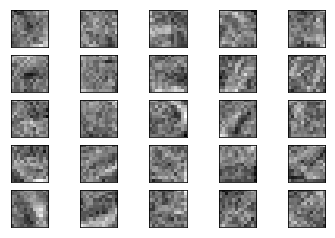

In [48]:
def plot_conv_weights(weights, input_channel=0):
    #use saved sess
    model_path = os.path.expanduser("~/Desktop/best_model.ckpt")
    sess = tf.Session()
    saver = tf.train.Saver()
    saver.restore(sess, model_path)
    
    # Retrieve the values of the weight-variables from TensorFlow.
    w = sess.run(weights)
    # Get the lowest and highest values for the weights.
    w_min = np.min(w)
    w_max = np.max(w)
    # Number of filters used in the conv. layer.
    num_filters = w.shape[3]
    # Number of grids to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(num_grids, num_grids)

    # Plot all the filter-weights.
    for i, ax in enumerate(axes.flat):
        # Only plot the valid filter-weights.
        if i<num_filters:
            # Get the weights for the i'th filter of the input channel.
            # See new_conv_layer() for details on the format
            # of this 4-dim tensor.
            img = w[:, :, input_channel, i]

            # Plot image.
            ax.imshow(img, vmin=w_min, vmax=w_max,
                      interpolation='nearest', cmap=plt.cm.gray)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

#visualize the 25 filters in the first layer
plot_conv_weights(W_conv1)